## Part 1d: (not that mini) Mini Test
Objective: 

This notebook aims to check your knowledge on what you have learnt from Part1a, Part1b and Part1c. Enjoy!

Number of Exercise: 1

Expected Time to Finish: 1 hour

#### i. Call Database to get JSON data 

We are going to find top 5 promotions received by a specific player from the same database named "DataProduct".

This time we would like to get table named "dbo.minitest".

In [ ]:
import pyodbc ##package for connection
import pandas as pd ##package for dataframe manipulation
import datetime as dt
import json

In [ ]:
## Start Here ###
conn = pyodbc.connect('Driver={SQL Server};'            # Driver is the ODBC that your PC has installed. For our production, let's use SQL Server
                      'Server=MMWSREDSTGDWH01,18000;'   # The Server will be the location of the SQL Server. It can be IP address or hostname.
                      'Database=DataProduct;'       #  <<< Enter the correct Database
                      'Trusted_Connection=yes;')        # Use Windows Authentication (If you wish to use SQL credentials, specified UID and PWD instead)
## End Here ###

# This cursor will be your handy variable to communicate with the database.
cursor = conn.cursor()

In [ ]:
## Start Here ###
## Write sql to get all from dbo.minitest ##
sql = 'select * from dbo.minitest'
df = pd.read_sql(sql, conn)
## End Here ###

In [ ]:
assert len(df) == 1457

In [ ]:
df.head(5)

#### ii.	Convert JSON data into Pandas dataframe

In [ ]:
https://www.freecodecamp.org/news/python-read-json-file-how-to-load-json-from-a-file-and-parse-dumps/


One column is called "Result" and we will use it to find the top 5 sent promotions.

In [ ]:
## create a column called json by loading the "Result" in the format of JSON.
def load_json(x):    
## Start here ##
## load json and transform to dictionary
    data_dict = json.loads(x)
    return data_dict
## End Here ###

df['json'] = df['Result'].apply(load_json)
df.head(5)
#type(df['json'][0])

In [ ]:
assert type(df['json'][0]) is dict
print ("You're awesome!")

#### iii. Clean dataset

Get the ALL promotions received by player.

You need to fully understand the data structure of json given to finish this task!

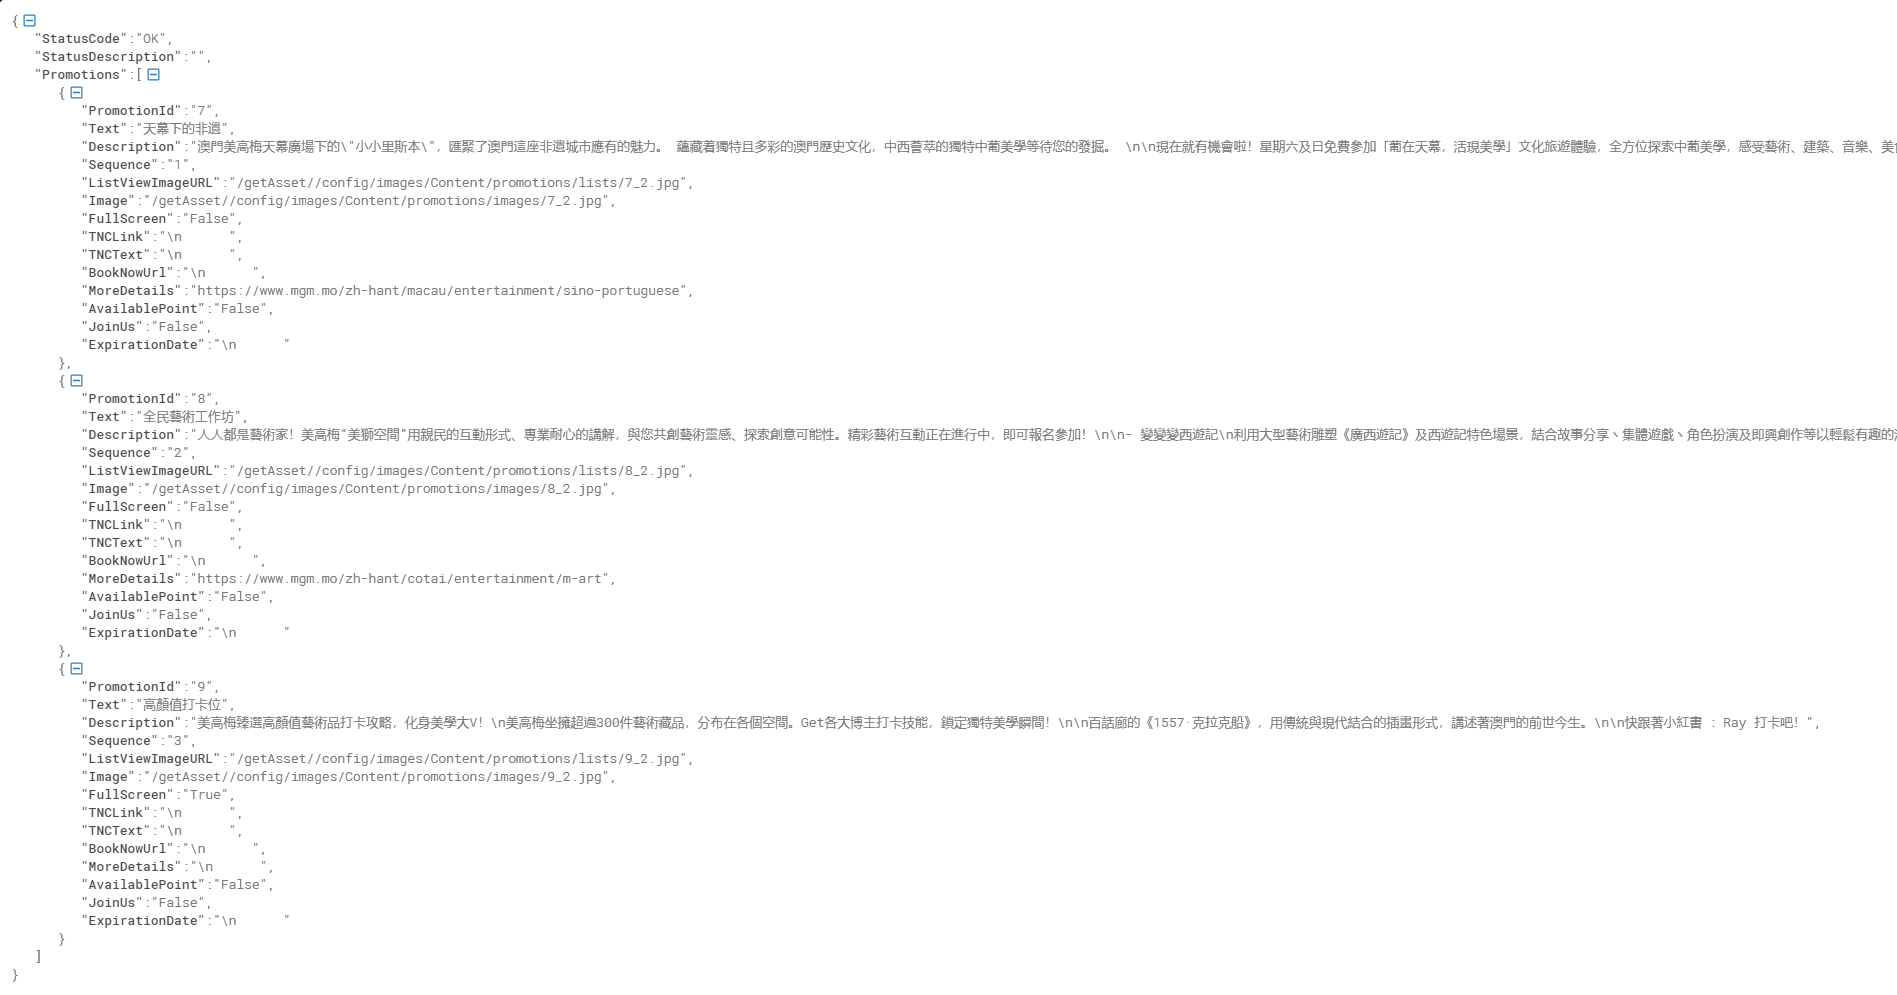

In [ ]:
## since json column is dictionary
## we can find promotions from it and store it in a list
promotions = [] 

# Loop through each row
for row in range(len(df)):
    sms = df['json'][row]    
    # However, since not all SMS contains promotions
    # we need to set a condition to filter it
    if 'Promotions' in sms: 
        ### Start Here ###
        # players do receive more than one promotion per SMS
        # store the text into the list named promotions
        # hints: use loop!
        PromotionContent = sms["Promotions"]      
        for i in range(len(PromotionContent)):
            text = PromotionContent[i]["Text"]
            promotions.append(text)
        ### End Here ###

promotions
sms

In [ ]:
sample0 = df['json'][0]
#sample0.keys()
sample0['Banners'][0]['text']

In [ ]:
sample1 = df['json'][1]
sample1['PromotionTypes'][0]['Text']

In [ ]:
sample2 = df['json'][2]
#sample2.keys()
sample2['PopUpPromotions'][0]['Text']

In [ ]:
sample3 = df['json'][3]
sample3.keys()
sample3['Promotions'][0]#['Text']

In [ ]:
assert len(promotions) == 366
assert type(promotions[1]) is str

In [ ]:
## right now count the promotion in promotions
counts = 0
PromotionList = []

for promotion in promotions:
    ### Start here ###
    ### hints: a if else statement will help
    if promotion not in PromotionList:
        counts = counts + 1
        PromotionList.append(promotion)        
    ### End here ###

PromotionList

In [ ]:
https://www.geeksforgeeks.org/how-to-count-unique-values-inside-a-list/
https://stackoverflow.com/questions/41407422/python-count-and-group-items-in-list-stored-in-dictionary


In [ ]:
d  = {'text1': ['A', 'C', 'E', 'F'], 
      'text2': ['A'], 
      'text3': ['C', 'D'], 
      'text4': ['A', 'B'], 
      'text5': ['A']}

letters = {}
for item in d.keys():
    for letter in d[item]:
        if letter not in letters.keys():
            letters[letter] = [1,[item]]            
        else:
            letters[letter][0] += 1
            letters[letter][1] += [item]

letters

In [ ]:
## right now count the promotion in promotions
counts = {}

for promotion in promotions:
### Start here ###
### hints: a if else statement will help
    if promotion not in counts.keys():
        counts[promotion] = 1
    else:
        counts[promotion] += 1        
### End here ###

counts
#print (counts.keys())

In [102]:
counts = {}
#for item in sample3['Promotions'][row]:
    #for promotion in sample3['Promotions']: 

for row in range(len(df)):
    sms = df['json'][row]
    if 'Promotions' in sms: 
        PromotionContent = sms["Promotions"]      
        for i in range(len(PromotionContent)):
            promotion = PromotionContent[i]["Text"]
            if promotion not in counts.keys():
                counts[promotion] = 1
            else:
                counts[promotion] += 1   
counts

{'空中海洋秀': 4,
 '天幕下的非遺': 12,
 '全民藝術工作坊': 14,
 '高顏值打卡位': 12,
 '盛焰環球品酒會': 4,
 '美高梅婚嫁展': 5,
 '川式小清新': 6,
 '微醺之夜': 5,
 '天幕下午茶': 5,
 '紅人熱推': 12,
 '交通指南': 12,
 '至潮手信': 11,
 '入境需知': 10,
 '遊澳攻略': 10,
 '展覽活動': 10,
 '換領美高梅購物禮券 輕鬆購物': 7,
 '您的專屬美高梅禮品集': 3,
 'Redeem MGM Money Voucher': 5,
 'Immigration Information': 19,
 'Macau Travel Tips': 19,
 'Exhibition & Event': 18,
 'MGM Hotspots': 13,
 'MGM Transportation': 11,
 'Take Home Gifts': 11,
 'Beyond Spicy': 16,
 'The Art of Mixology': 17,
 'A Cuppa under the Sky': 16,
 'Sino-Portuguese Cultural Experience ': 20,
 'M Art Workshop': 19,
 'Strike a Pose': 19,
 'Wedding Open House': 5,
 'Bar 58 Sommelier Nights': 5,
 'Sea Odyssey': 5,
 'Your Exclusive Gift Collection': 3,
 '立享85折餐飲券': 1,
 'Join for 15% dining discount voucher': 2}

In [103]:
# store the top 5 promotions in correct order
final_list = []

### Start here ###
### hints: https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

#{k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
final_list = list(dict(sorted(counts.items(), key=lambda item: item[1], reverse=True)[:5]).keys())
final_list

['Sino-Portuguese Cultural Experience ',
 'Immigration Information',
 'Macau Travel Tips',
 'M Art Workshop',
 'Strike a Pose']

In [105]:
assert final_list[0] == 'Sino-Portuguese Cultural Experience '
assert final_list[2] == 'Macau Travel Tips'
assert final_list[3] == 'M Art Workshop'
assert len(final_list) == 5

Congrats!!! You have finished the mini test :D